<h1> Multilayer Perceptron<h1>
<h3> Aprendizado de Máquinas<h3>

In [1]:
# importando as Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics, datasets
from math import sqrt

In [ ]:
# Carregar o dataset
iris = datasets.load_iris()
iris

In [ ]:
# Separar entre features e target:
x = iris.data
y = iris.target

print(x)
print("\n",y)

In [7]:
# Separar entre conjunto de treinamento e conjunto de teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("Amostras para treinamento: ", len(x_train), "| Para teste: ", len(x_test))

Amostras para treinamento:  105 | Para teste:  45


In [27]:
# Configurar a Rede Neural
clf = MLPClassifier(solver='sgd', alpha=1e-5, learning_rate='constant', learning_rate_init=0.005, max_iter=5000, hidden_layer_sizes=(4), random_state=1)

In [28]:
# Ajustar o classificador (Treinamento)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, learning_rate_init=0.005,
              max_iter=5000, random_state=1, solver='sgd')

In [29]:
# Fazendo Predições:
y_pred = clf.predict(x_test)

In [30]:
# Avaliar as métricas do modelo:
print("Acurácia: ", metrics.accuracy_score(y_pred, y_test))
print("Erro médio quadrático(MSE): ", metrics.mean_squared_error(y_pred,y_test))
print("RMSE: ", sqrt(metrics.mean_squared_error(y_pred, y_test)))

Acurácia:  0.9777777777777777
Erro médio quadrático(MSE):  0.022222222222222223
RMSE:  0.14907119849998599


In [38]:
# Obter curvas de aprendizado:
# ...cv = 10, significa que vai treinar 10 vezes em cada uma das 5 etapas
train_sizes, train_scores, valid_scores = learning_curve(clf, x, y, cv=10)

In [39]:
# Quantidade de amostras por treinamento:
print(train_sizes)

[ 13  43  74 104 135]


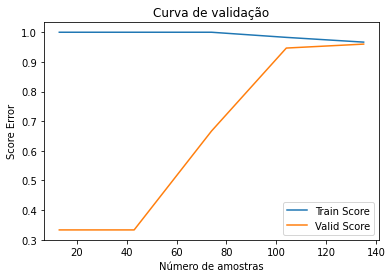

In [50]:
# Visualizar as curvas de treinamento
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train Score")
plt.plot(train_sizes, valid_scores_mean, label="Valid Score")
plt.legend(loc="best")
plt.xlabel("Número de amostras")
plt.ylabel("Score Error")
plt.title("Curva de validação")
plt.show()

# É desejavel linhas próximas, assim vai mostrar se a quantidade de amostras são suficiente ou não.

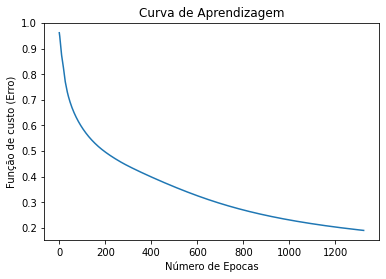

In [51]:
plt.title("Curva de Aprendizagem")
plt.ylabel("Função de custo (Erro)")
plt.xlabel("Número de Epocas")
plt.plot(clf.loss_curve_)
plt.show()